# CNN model with orthogonal encoding, window size 17
In this model, we converted the sst3 sequence to orthogonal encoding and treated each character in the encoding as a feature. The window was chosen based on the results of experiments in related work. Since each encoding character is a feature, the amount of data grows very fast and a limit 'd' is set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from timeit import default_timer as timer
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv1D, Conv2D, MaxPool2D, Reshape, BatchNormalization, MaxPooling2D
from keras import optimizers
from sklearn.metrics import accuracy_score
import random
import os
import tensorflow

In [2]:
df = pd.read_csv('datasets/2018-06-06-pdb-intersect-pisces.csv')

In [3]:
window =17
aminoacids = 'ACDEFGHIKLMNPQRSTVWY*'
n = len(aminoacids)
matrice = np.identity(n)

In [4]:
aa_dict = {}
i = 0
for aa in aminoacids:
    aa_dict[aa] = matrice[i,]
    i += 1

In [5]:
tempdict = {}
codes = []
d = 30000
a = 0
data = {'H':0, 'E':0, 'C':0}
while (data['H'] + data['E'] + data['C']) < d:
    sequence = df.loc[a,'seq']
    seq_sst3 = df.loc[a,'sst3']
    i = 0
    while i <= (len(sequence)-window):
        j = 0
        if seq_sst3[int((i+i+window)/2)] == 'H':
            for character in sequence[i:i+window]:
                for k in range(n):
                    tempdict[f'a{j}a{k}'] = aa_dict[character][k]
                    k +=1
                j += 1
            tempdict['sst3'] = 0
            codes.append(tempdict)
            tempdict = {}
            i += 1
            data['H'] += 1
        elif seq_sst3[int((i+i+window)/2)] == 'E':
            for character in sequence[i:i+window]:
                for k in range(n):
                    tempdict[f'a{j}a{k}'] = aa_dict[character][k]
                    k +=1
                j += 1
            tempdict['sst3'] = 1
            codes.append(tempdict)
            tempdict = {}
            i += 1
            data['E'] += 1
        elif seq_sst3[int((i+i+window)/2)] == 'C':
            for character in sequence[i:i+window]:
                for k in range(n):
                    tempdict[f'a{j}a{k}'] = aa_dict[character][k]
                    k +=1
                j += 1
            tempdict['sst3'] = 2
            codes.append(tempdict)
            tempdict = {}
            i += 1
            data['C'] += 1
        else:
            i += 1
    a += 1
df2 = pd.DataFrame(codes)
df2.loc[:30]

,a0a0,a0a1,a0a2,a0a3,a0a4,a0a5,a0a6,a0a7,a0a8,a0a9,...,a16a12,a16a13,a16a14,a16a15,a16a16,a16a17,a16a18,a16a19,a16a20,sst3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
X = df2.drop(['sst3'], axis=1)
y = df2['sst3']
# Normalize the data
cols = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
# Reshape
X = X.values.reshape(-1,window,21)
# Label Encoding
y = to_categorical(y, num_classes = 3)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.25, random_state=0)

LR = 0.0009
drop_out = 0.38
batch_dim = 64
nn_epochs = 45
loss = 'categorical_crossentropy'
do_summary = True

In [7]:
def CNN_model():
    np.random.seed(0)
    tensorflow.random.set_seed(0)
    random.seed(0)
    os.environ['PYTHONHASHSEED']=str(0)
    m = Sequential()
    m.add(Conv1D(128, 11, padding='same', activation='relu', input_shape=(window, 21)))  # <----
    m.add(Dropout(drop_out, seed=0))
    m.add(Conv1D(64, 11, padding='same', activation='relu'))
    m.add(Dropout(drop_out, seed=0))
    m.add(Conv1D(3, 11, padding='same', activation='relu'))
    m.add(Flatten())
    m.add(Dense(3, activation='softmax'))# <----
    opt = optimizers.Adam(lr=LR)
    m.compile(optimizer=opt,
              loss=loss,
              metrics=['accuracy', 'mae', 'mse'])
    m.build()
    if do_summary:
        print("\nHyper Parameters\n")
        print("Learning Rate: " + str(LR))
        print("Drop out: " + str(drop_out))
        print("Batch dim: " + str(batch_dim))
        print("Number of epochs: " + str(nn_epochs))
        print("\nLoss: " + loss + "\n")

        m.summary()
    return m

In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
pat = 5 #this is the number of epochs with no improvement after which the training will stop
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)

#define the model checkpoint callback -> this will keep on saving the model as a physical file
model_checkpoint = ModelCheckpoint('fas_mnist_1.h5', verbose=1, save_best_only=True)

In [85]:
start_time = timer()
model = CNN_model()
history = model.fit(X_train, Y_train, epochs= nn_epochs, callbacks=[early_stopping, model_checkpoint], batch_size= batch_dim, shuffle=True,
                        validation_data=(X_val, Y_val))
end_time = timer()
print("\n\nTime elapsed: " + "{0:.2f}".format((end_time - start_time)) + " s")
predictions = model.predict(X_val)


Hyper Parameters

Learning Rate: 0.0009
Drop out: 0.38
Batch dim: 64
Number of epochs: 45

Loss: categorical_crossentropy

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_78 (Conv1D)          (None, 17, 128)           29696     
                                                                 
 dropout_52 (Dropout)        (None, 17, 128)           0         
                                                                 
 conv1d_79 (Conv1D)          (None, 17, 64)            90176     
                                                                 
 dropout_53 (Dropout)        (None, 17, 64)            0         
                                                                 
 conv1d_80 (Conv1D)          (None, 17, 3)             2115      
                                                                 
 flatten_26 (Flatten)        (None, 51)                0     

Text(0.5, 0, 'Epochs')

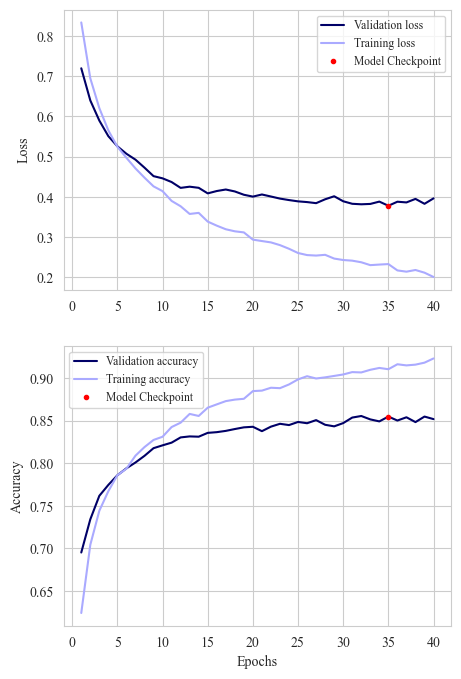

In [100]:
plt.rcParams['font.sans-serif'] = "Times New Roman"
fig, ax = plt.subplots(2,1, figsize=(5,8))
# Plot the loss and accuracy curves for training and validation
ax[0].plot(np.arange(1,len(history.history['val_loss'])+1),history.history['val_loss'], label="Validation loss", c='#000067')
ax[0].plot(np.arange(1,len(history.history['loss'])+1),history.history['loss'], label="Training loss", c='#AAAAFF')
ax[0].plot(35, history.history['val_loss'][34], 'go', markersize=3, c='r', label='Model Checkpoint')
ax[0].legend(fontsize='small')
ax[0].set_ylabel('Loss')
ax[1].plot(np.arange(1,len(history.history['val_accuracy'])+1),history.history['val_accuracy'], label="Validation accuracy", c='#000067')
ax[1].plot(np.arange(1,len(history.history['accuracy'])+1),history.history['accuracy'], label="Training accuracy", c='#AAAAFF')
ax[1].plot(35, history.history['val_accuracy'][34], 'go', markersize=3, c='r', label='Model Checkpoint')
ax[1].set_ylabel('Accuracy')
ax[1].legend(fontsize='small')
plt.xlabel('Epochs')

188/188 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3034
           1       0.77      0.69      0.73       888
           2       0.76      0.83      0.80      2090

    accuracy                           0.85      6012
   macro avg       0.82      0.81      0.81      6012
weighted avg       0.85      0.85      0.85      6012



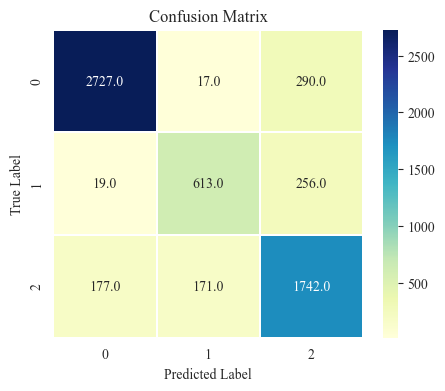

In [101]:
import seaborn as sns
model = load_model('fas_mnist_1.h5')
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="YlGnBu", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
print(classification_report(Y_true, Y_pred_classes))

In [99]:
# compute and print accuracy score
print('Model accuracy score with CNN classifier: {0:0.4f}'. format(accuracy_score(Y_true, Y_pred_classes)))
# check for overfitting and underfitting
Y_train_pred = model.predict(X_train)
Y_train_pred_classes = np.argmax(Y_train_pred,axis = 1)
Y_train_true = np.argmax(Y_train,axis = 1)
print('Training set score: {:.4f}'.format(accuracy_score(Y_train_true, Y_train_pred_classes)))
# compare model accuracy with null accuracy
Y_true_df = pd.DataFrame(Y_true)
null_accuracy = (max(Y_true_df.value_counts())/(sum(Y_true_df.value_counts())))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Model accuracy score with CNN classifier: 0.8453
564/564 [==============================] - 2s 4ms/step
Training set score: 0.9889
Null accuracy score: 0.5047


In [9]:
def fit_and_evaluate(t_x, test_x, t_y, test_y, EPOCHS, BATCH_SIZE):
    model = None
    model = CNN_model()
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping, model_checkpoint],
              verbose=1, validation_split=0.25)
    val_scor = model.evaluate(test_x, test_y)
    print("Val Score: ", val_scor)
    return val_scor

 28/282 [=>............................] - ETA: 5s - loss: 0.2518 - accuracy: 0.8990 - mae: 0.0994 - mse: 0.0478

In [10]:
model_checkpoint = ModelCheckpoint('fas_mnist_1_6f.h5', verbose=1, save_best_only=True)
n_folds=6
epochs = 45
batch_size=64

#save the model history in a list after fitting so that we can plot later
model_history = []

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, test_x, t_y, test_y = train_test_split(X, y, test_size=0.2,
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history.append(fit_and_evaluate(t_x, test_x, t_y, test_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

Training on Fold:  1

Hyper Parameters

Learning Rate: 0.0009
Drop out: 0.38
Batch dim: 64
Number of epochs: 45

Loss: categorical_crossentropy

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 17, 128)           29696     
                                                                 
 dropout (Dropout)           (None, 17, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            90176     
                                                                 
 dropout_1 (Dropout)         (None, 17, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 17, 3)             2115      
                                                                 
 flatten (Flatten)           (None, 51)    

In [ ]:
np.average([0.8373253345489502, 0.8373253345489502, 0.8373253345489502, 0.8373253345489502, ])

In [14]:
model_array = np.array(model_history)
model_array

array([[0.40677431, 0.8521291 , 0.12807888, 0.07363142],
       [0.41132697, 0.83732533, 0.1439179 , 0.07738046],
       [0.41132697, 0.83732533, 0.1439179 , 0.07738046],
       [0.41132697, 0.83732533, 0.1439179 , 0.07738046],
       [0.41132697, 0.83732533, 0.1439179 , 0.07738046],
       [0.41132697, 0.83732533, 0.1439179 , 0.07738046]])

In [18]:
print('Average stratified 6-fold cross-validation score with knn classifier:{:.4f}'.format(model_array[:,1].mean()))
print('Average stratified 6-fold cross-validation MAE with knn classifier:{:.4f}'.format(model_array[:,2].mean()))
print('Average stratified 6-fold cross-validation MsE with knn classifier:{:.4f}'.format(model_array[:,3].mean()))

Average stratified 6-fold cross-validation score with knn classifier:0.8398
Average stratified 6-fold cross-validation MAE with knn classifier:0.1413
Average stratified 6-fold cross-validation MsE with knn classifier:0.0768
